In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simulator import simulate
# Read the Excel file
df = pd.read_excel('Experimental_data_temp700.xlsx')

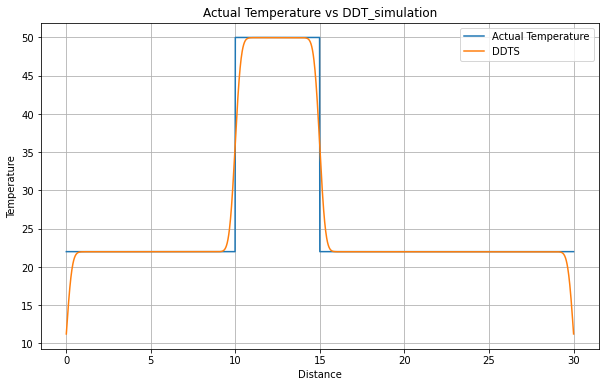

In [3]:
# Test case

H_start = 10
H_stop = 15
H_temperature = 50

# Call the simulate function
distance, actual_T, DDTS = simulate(H_start=H_start, H_stop=H_stop, H_temperature=H_temperature)

# Plot DDTS
plt.figure(figsize=(10, 6))
plt.plot(distance,actual_T, label='Actual Temperature')
plt.plot(distance,DDTS, label='DDTS')
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Actual Temperature vs DDT_simulation')
plt.legend()
plt.grid(True)
plt.show()

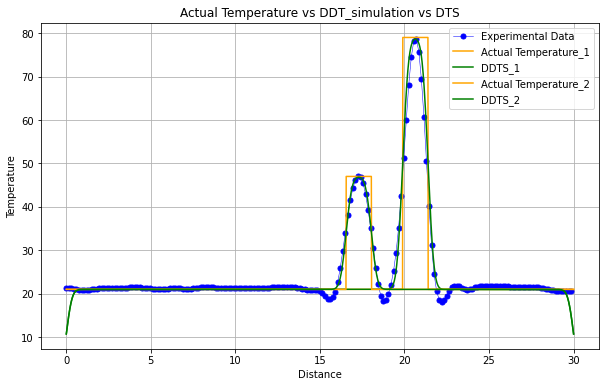

In [4]:

# Extract the data from rows 400 to 500
x = np.array(df.iloc[305:505, 1])  # 2nd column (Trace) 60m - 90m
y = np.array(df.iloc[305:505, 2])  # 3rd column (0)

# Define hot events
hot_events = [
    {'Center_of_temp': 65.80, 'width': 1.5, 'H_temperature': 79},
    {'Center_of_temp': 62.45, 'width': 1.5, 'H_temperature': 47.5}
]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot experimental data
plt.plot(x - np.min(x), y, marker='o', markersize=5, linestyle='-', linewidth=0.5, color='blue', label='Experimental Data')  

# Loop through each hot event and plot DTS simulation results
for i,hot_event in enumerate(hot_events):
    # Calculate H_start and H_stop
    H_start = (hot_event['Center_of_temp'] - np.min(x)) - (hot_event['width'] / 2)
    H_stop = (hot_event['Center_of_temp'] - np.min(x)) + (hot_event['width'] / 2)

    # Simulate DTS data
    distance, actual_T, DDTS = simulate(H_start=H_start, H_stop=H_stop, H_temperature=hot_event['H_temperature'], env_temp=21)

    # Plot DTS simulation results
    plt.plot(distance, actual_T, label=f'Actual Temperature_{i+1}',color='orange')
    plt.plot(distance, DDTS, label=f'DDTS_{i+1}', color='green')

plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Actual Temperature vs DDT_simulation vs DTS')
plt.legend()
plt.grid(True)
plt.show()
